#### 지도 학습 알고리즘
*   분류 : 샘플을 몇 개의 클래스 중 하나로 분류, 주어진 범주 중 하나를 예측
*   회귀 : 임의의 수치(타깃값) 예측 -> 정해진 클래스가 없고 임의의 수치 출력 ex) 경제 성장률 예측

##### k-최근접 이웃 분류 알고리즘
1. 예측하려는 샘플에 가장 가까운 샘플 k개 선택
2. 다수 클래스를 새로운 샘플의 클래스로 예측

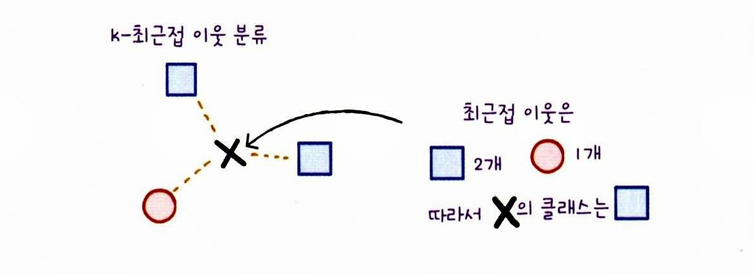

##### k-최근접 이웃 회귀
1. 예측하려는 샘플에 가장 가까운 샘플 k개 선택
2. 이웃한 샘플의 타깃값 평균을 구해서 예측값으로 사용

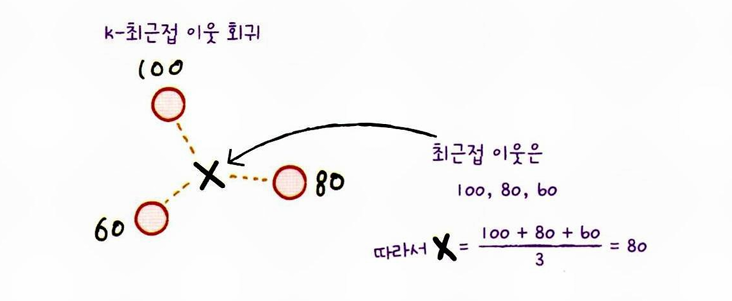

In [ ]:
# 농어의 길이를 사용해 무게를 예측하는 k-최근접 이웃 회귀 모델
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

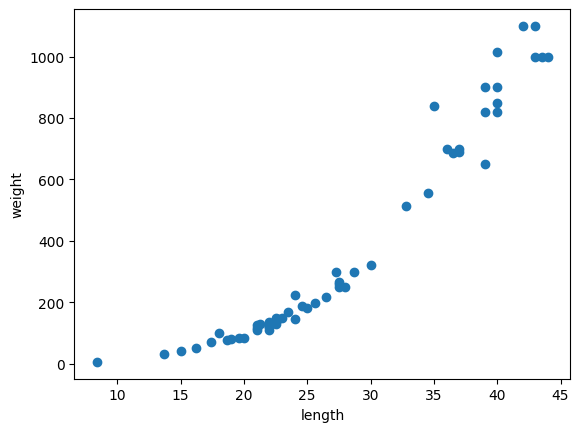

In [ ]:
# 산점도 -> 농어의 길이가 커짐에 따라 무게도 늘어남
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [ ]:
# 사이킷런에 사용할 훈련 세트는 2차원 배열이어야 함
print(train_input.shape, test_input.shape) # -> 1차원 배열

(42,) (14,)


In [ ]:
# 1차원 -> 2차원 배열로 변환
# reshape() : 배열의 크기를 바꾸는 메서드  (바꾸기 전후의 배열 원소 개수는 동일해야 함)
# reshape(-1, 1) : 첫 번째 크기를 나머지 원소 개수에 맞게 설정하고, 두 번째 크기를 1로 지정
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor() # 객체 생성
knr.fit(train_input, train_target) # k-최근접 이웃 회귀 모델 훈련

KNeighborsRegressor()

##### score() 결과
*   분류 : 정확도(정답을 맞힌 개수의 비율) = 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율
*   회귀 : 결정계수 -> 예측이 타깃에 아주 가까워지면 1에 가까워짐

💠 결정 계수 ($ R^2$)

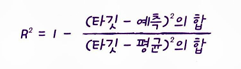

In [ ]:
# 테스트 세트 점수 확인
knr.score(test_input, test_target)

0.992809406101064

In [ ]:
# mean_absolute_error() : 타깃과 예측의 절댓값 오차를 평균하여 반환
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input) # 테스트 세트에 대한 예측 생성
mae = mean_absolute_error(test_target, test_prediction) # 테스트 세트에 대한 평균 절댓값 오차 계산
print(mae)

19.157142857142862


#### 과대적합 vs 과소적합
*   일반적으로 훈련 세트의 점수가 테스트 세트보다 조금 더 높음 (점수 차가 크면 좋지 않음)
*   과대적합 : 훈련 세트 점수가 테스트 세트 점수에 비해 너무 높은 경우 -> 새로운 샘플 예측 잘 안됨
*   과소적합 : 그 반대이거나 두 점수가 모두 낮은 경우 (모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않음)

💠 문제 해결
*   과대적합 해결 : 모델을 덜 복잡하게 만들기. k-최근접 이웃의 경우 k값 늘리기
*   과소적합 해결 : 모델을 더 복잡하게 만들기 (훈련 세트에 더 잘 맞게 만들기).  k-최근접 이웃의 경우 k값 줄이기

In [ ]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [ ]:
# k-최근접 이웃 알고리즘 : 이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해지고, 늘리면 데이터 전반의 일반적인 패턴을 따름

knr.n_neighbors = 3 # 이웃의 개수를 3으로 설정 (기본값은 5)
knr.fit(train_input, train_target) # 모델 다시 훈련
print(knr.score(train_input, train_target)) # 훈련 세트의 점수

0.9804899950518966


In [ ]:
print(knr.score(test_input, test_target)) # 테스트 세트의 점수

0.9746459963987609


#### 확인문제

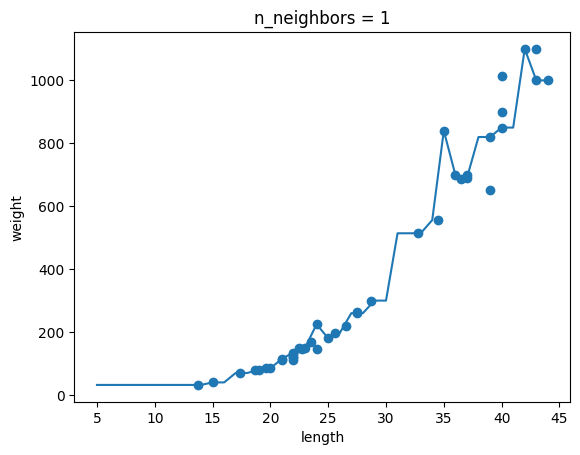

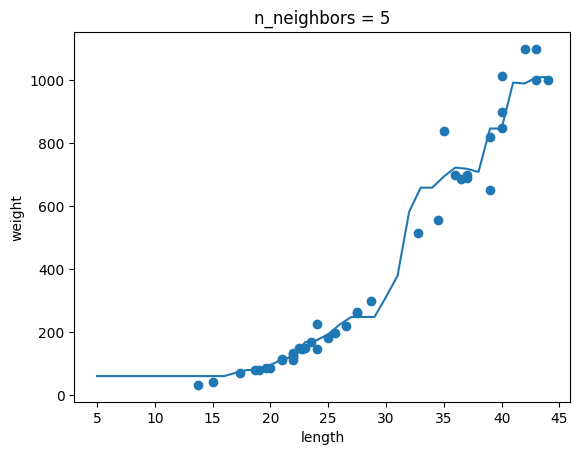

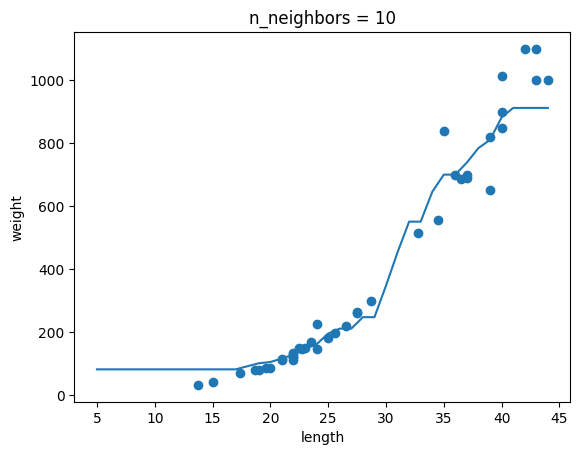

In [ ]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()